In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv('train.csv')

In [97]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [98]:
df.shape

(20800, 5)

In [99]:
df['context'] = df['title']+df['author']

In [100]:
df.drop(columns=['id', 'title' , 'author'], inplace=True)

In [101]:
df.head(10)

,text,label,context
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You FiredConsortiumnew...
3,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
5,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...
6,Ever wonder how Britain’s most iconic pop pian...,1,NaN
7,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...
8,Donald J. Trump is scheduled to make a highly ...,0,NaN
9,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co..."


In [102]:
df['context'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted ItDarrell Lucus'

In [103]:
df.isnull().sum()

text         39
label         0
context    2515
dtype: int64

In [104]:
df = df.dropna()

In [105]:
df.isnull().sum()

text       0
label      0
context    0
dtype: int64

In [106]:
df.duplicated().sum()

44

In [107]:
df = df.drop_duplicates(keep='first')

<Axes: ylabel='label'>

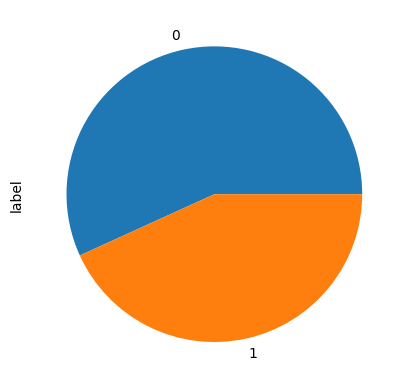

In [108]:
df['label'].value_counts().plot(kind='pie')

## NLP PREPROCESSIONG

In [109]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [110]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    s = ""
    for i in text:
        if i.isalnum() and i not in stopwords.words('english'):
            s= s+ps.stem(i)+" "
    return s


In [111]:
transform_text("You looking good bro, come on")

'look good bro come '

In [112]:
df['context'] = df['context'].apply(transform_text)

In [163]:
df.head(20)

,text,label,context
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,Ever get the feeling your life circles the rou...,0,flynn hillari clinton big woman campu breitbar...
2,"Why the Truth Might Get You Fired October 29, ...",1,truth might get
3,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilian kill singl us airstrik identifiedj...
4,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jail fiction unpublish stori wom...
5,"In these trying times, Jackie Mason is the Voi...",0,jacki mason hollywood would love trump bomb no...
7,"PARIS — France chose an idealistic, traditi...",0,benoît hamon win french socialist parti presid...
9,A week before Michael T. Flynn resigned as nat...,0,plan ukrain russia courtesi trump associ new y...
10,"Organizing for Action, the activist group that...",0,obama organ action partner indivis disrupt tru...
11,The BBC produced spoof on the “Real Housewives...,0,bbc comedi sketch real housew isi caus outrage...


In [174]:
df['text'][2]

'Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts and political policymakers has always been between honest assessments and desired results, with the latter often overwhelming the former, as in the Iraq War, writes Lawrence Davidson. \nBy Lawrence Davidson \nFor those who might wonder why foreign policy makers repeatedly make bad choices, some insight might be drawn from the following analysis. The action here plays out in the United States, but the lessons are probably universal. \nBack in the early spring of 2003, George W. Bush initiated the invasion of Iraq. One of his key public reasons for doing so was the claim that the country’s dictator, Saddam Hussein, was on the verge of developing nuclear weapons and was hiding other weapons of mass destruction. The real reason went beyond that charge and included a long-range plan for “regime change” in the Middle East. President George W. Bush and Vice President Dick Cheney receive an Oval Off

In [114]:
from wordcloud import WordCloud

In [115]:
wc = WordCloud(height=500,width=500,min_font_size=10,background_color='white')

In [116]:
fake_wc = wc.generate(df[df['label']==1]['context'].str.cat(sep=" "))

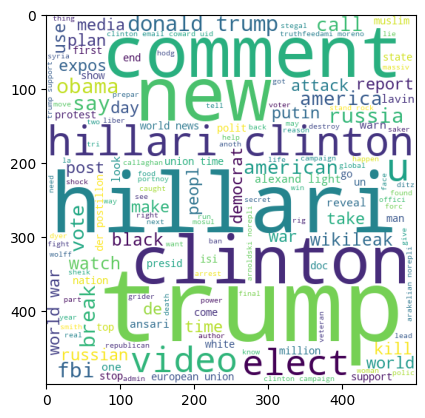

In [117]:
plt.imshow(fake_wc)

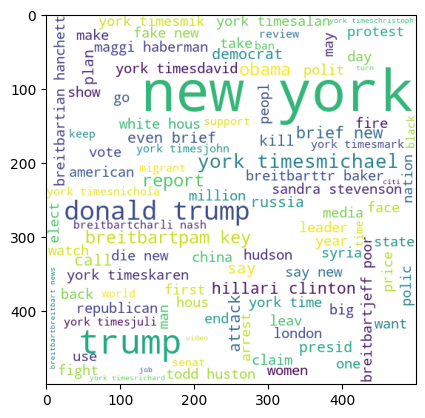

In [118]:
credible_wc = wc.generate(df[df['label']==0]['context'].str.cat(sep=" "))
plt.imshow(credible_wc)

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [120]:
x = tfidf.fit_transform(df['context']).toarray()

In [137]:
x.shape

(18241, 22603)

In [122]:
y = df['label']

In [123]:
from sklearn.model_selection import train_test_split

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, stratify=y,test_size=0.2)

In [143]:
x_train[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.]])

In [145]:
y_train.shape

(14592,)

## Model Building

In [146]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [147]:
lr.fit(x_train,y_train)

LogisticRegression()

In [130]:
from sklearn.metrics import accuracy_score, precision_score

In [176]:
y_pred_lr = lr.predict(x_test)

In [178]:
print(y_pred_lr)

[1]


In [179]:
print(accuracy_score(y_pred_lr,y_test))
print(precision_score(y_pred_lr,y_test))

1.0
1.0


In [183]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
accuracy_score(y_test,mnb.predict(x_test))

0.9081940257604824

In [181]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=100,n_jobs=-1)
rfc.fit(x_train,y_train)
accuracy_score(y_test,rfc.predict(x_test))

1.0

In [136]:
print(precision_score(y_test,rfc.predict(x_test)))

0.9327731092436975


## Pickle

In [138]:
import pickle

In [173]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))